In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Osnovne informacije o Dataset-u:

In [ ]:
employee = pd.read_sql("SELECT * FROM employee", con="mssql+pyodbc://DESKTOP-F3FJIDA/Ammar?driver=ODBC+Driver+17+for+SQL+Server")

In [ ]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
employee.shape

(2764, 9)

In [6]:
employee.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


In [ ]:
employee.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
employee.isnull().sum().to_frame("Number of null values") 

,Number of null values
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [ ]:
employee.duplicated().sum() 

np.int64(0)

In [11]:
employee.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [12]:
for i in employee:
    if employee[i].dtype == "object":
         print(f"{i} : {employee[i].unique()}")

Education : ['Bachelors' 'Masters' 'PHD']
City : ['Bangalore' 'Pune' 'New Delhi']
Gender : ['Male' 'Female']
EverBenched : ['No' 'Yes']


In [13]:
sorted(employee["PaymentTier"].unique())

[np.int64(1), np.int64(2), np.int64(3)]

In [14]:
sorted(employee["ExperienceInCurrentDomain"].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7)]

In [15]:
sorted(employee["Age"].unique())

[np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41)]

In [16]:
sorted(employee["JoiningYear"].unique())

[np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018)]

In [17]:
employee["LeaveOrNot"].unique()

array([0, 1])

In [18]:
employee["LeaveOrNot"].value_counts(normalize= True)*100

LeaveOrNot
0    60.636758
1    39.363242
Name: proportion, dtype: float64

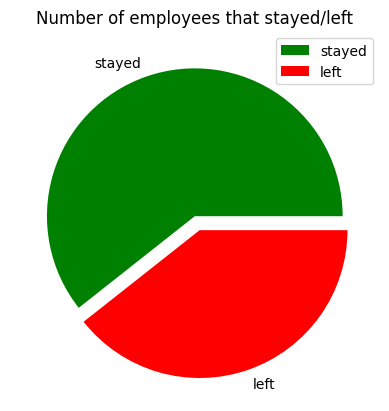

In [ ]:
plt.pie(employee["LeaveOrNot"].value_counts(),labels=["stayed","left"],colors=["g","r"],explode=[0,0.1])
plt.title("Number of employees that stayed/left")

plt.legend()
plt.show()

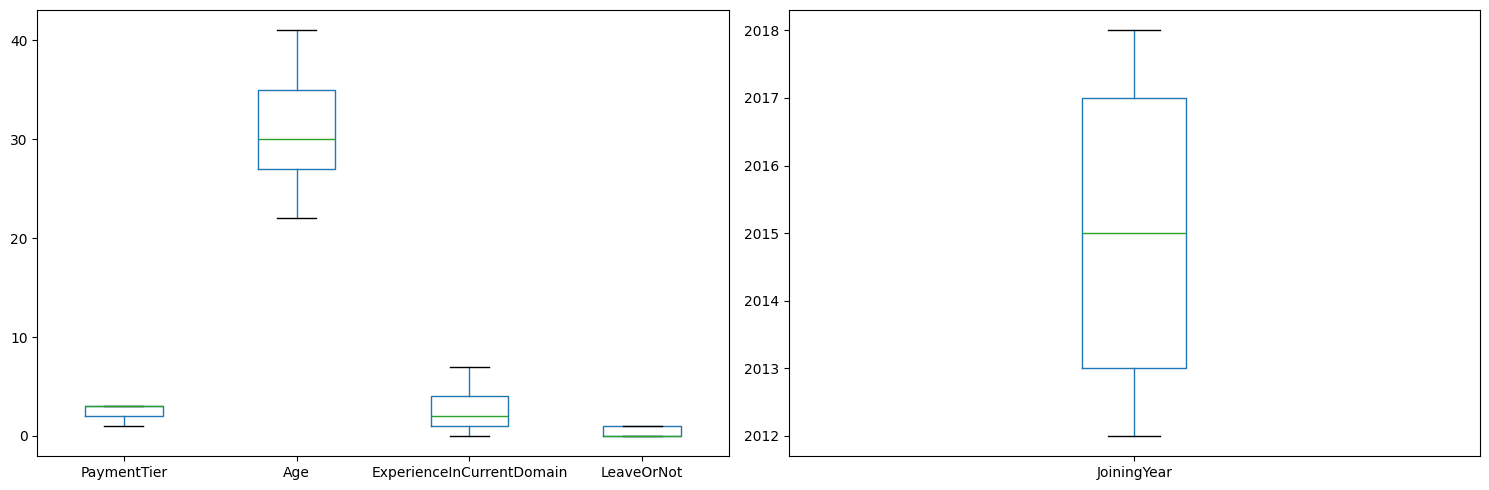

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

employee.drop("JoiningYear",axis=1).boxplot(figsize=(10,10), grid=False, ax=ax[0])
employee["JoiningYear"].to_frame().boxplot(grid=False, ax=ax[1])

plt.tight_layout()
plt.show()

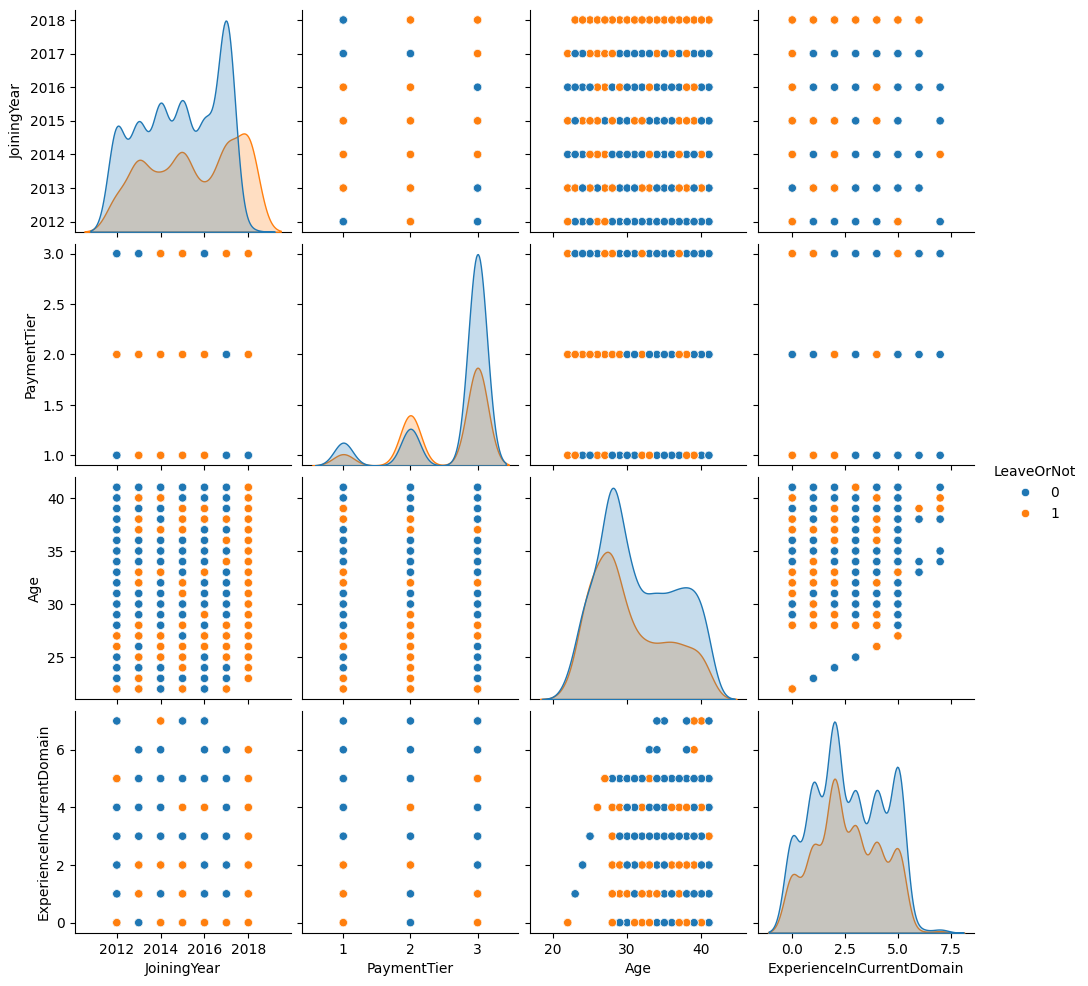

In [20]:
sns.pairplot(data=employee,hue="LeaveOrNot") 
plt.show()

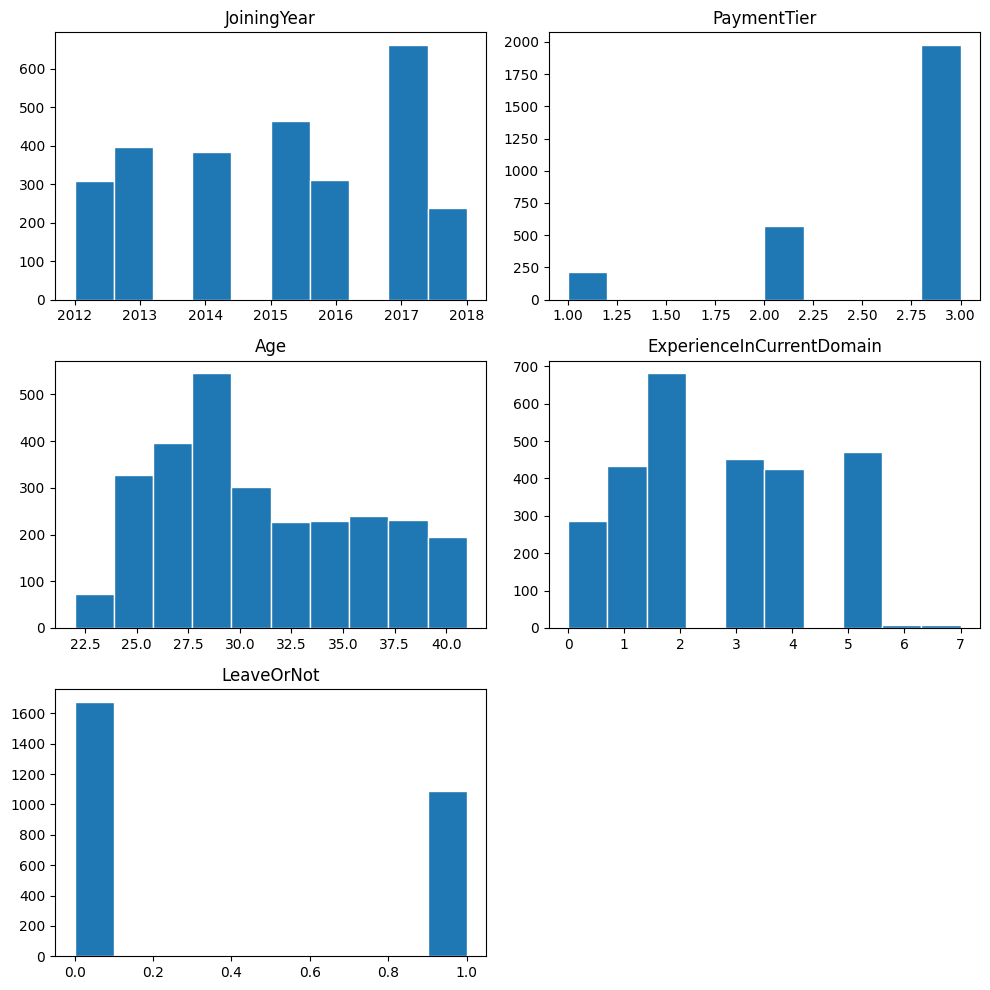

In [ ]:
employee.hist(figsize=(10,10),grid=False,edgecolor="w") # Numeričke kolone

plt.tight_layout()
plt.show()

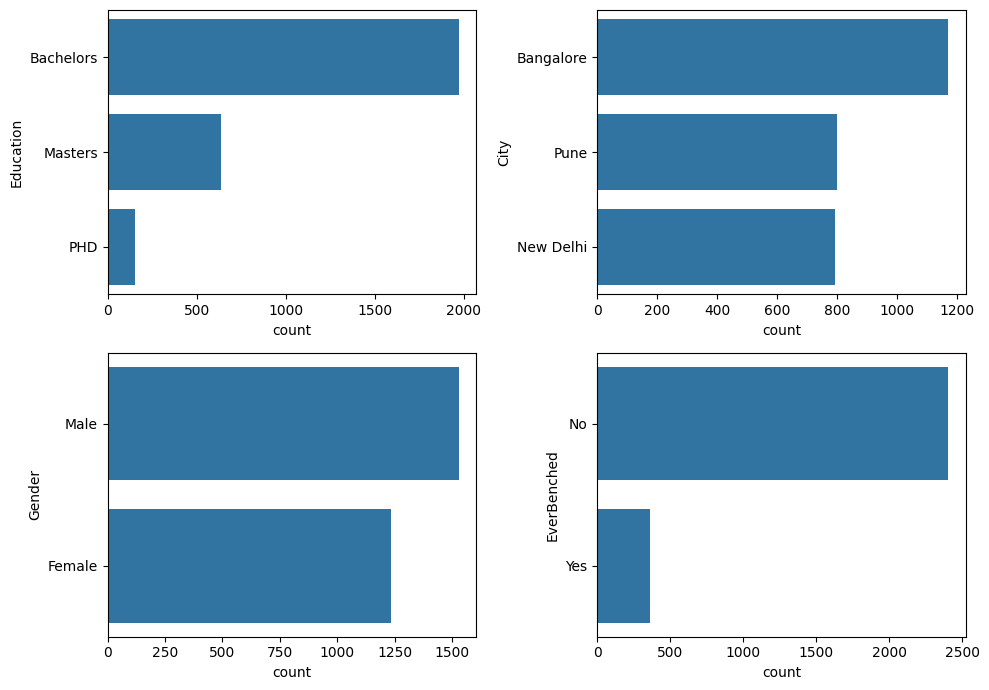

In [ ]:
cat_cols = ['Education', 'City', 'Gender', 'EverBenched'] # Kategoricke kolone

fig, ax = plt.subplots(2,2,figsize=(10,7))

sns.countplot(employee['Education'], ax=ax[0,0])
sns.countplot(employee["City"], ax=ax[0,1])
sns.countplot(employee['Gender'], ax=ax[1,0])
sns.countplot(employee['EverBenched'], ax=ax[1,1])

plt.tight_layout()
plt.show()

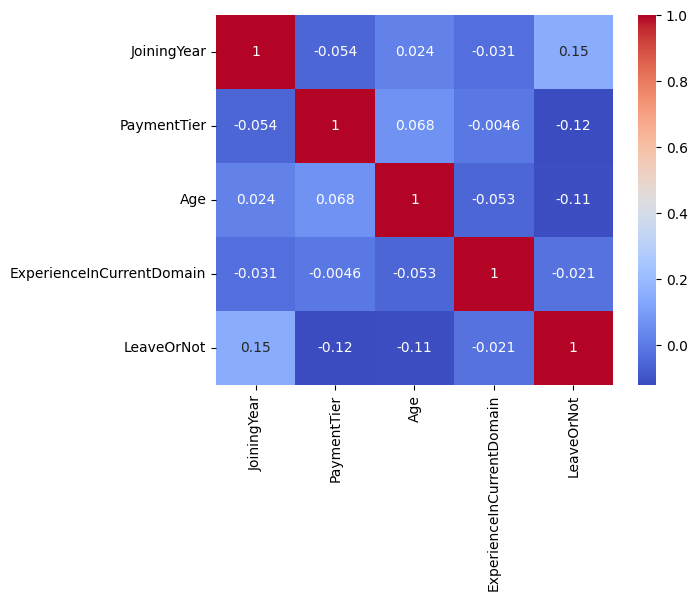

In [23]:
sns.heatmap(employee.corr(numeric_only=True),annot=True, cmap="coolwarm") #Nema jacih korelacija
plt.show()

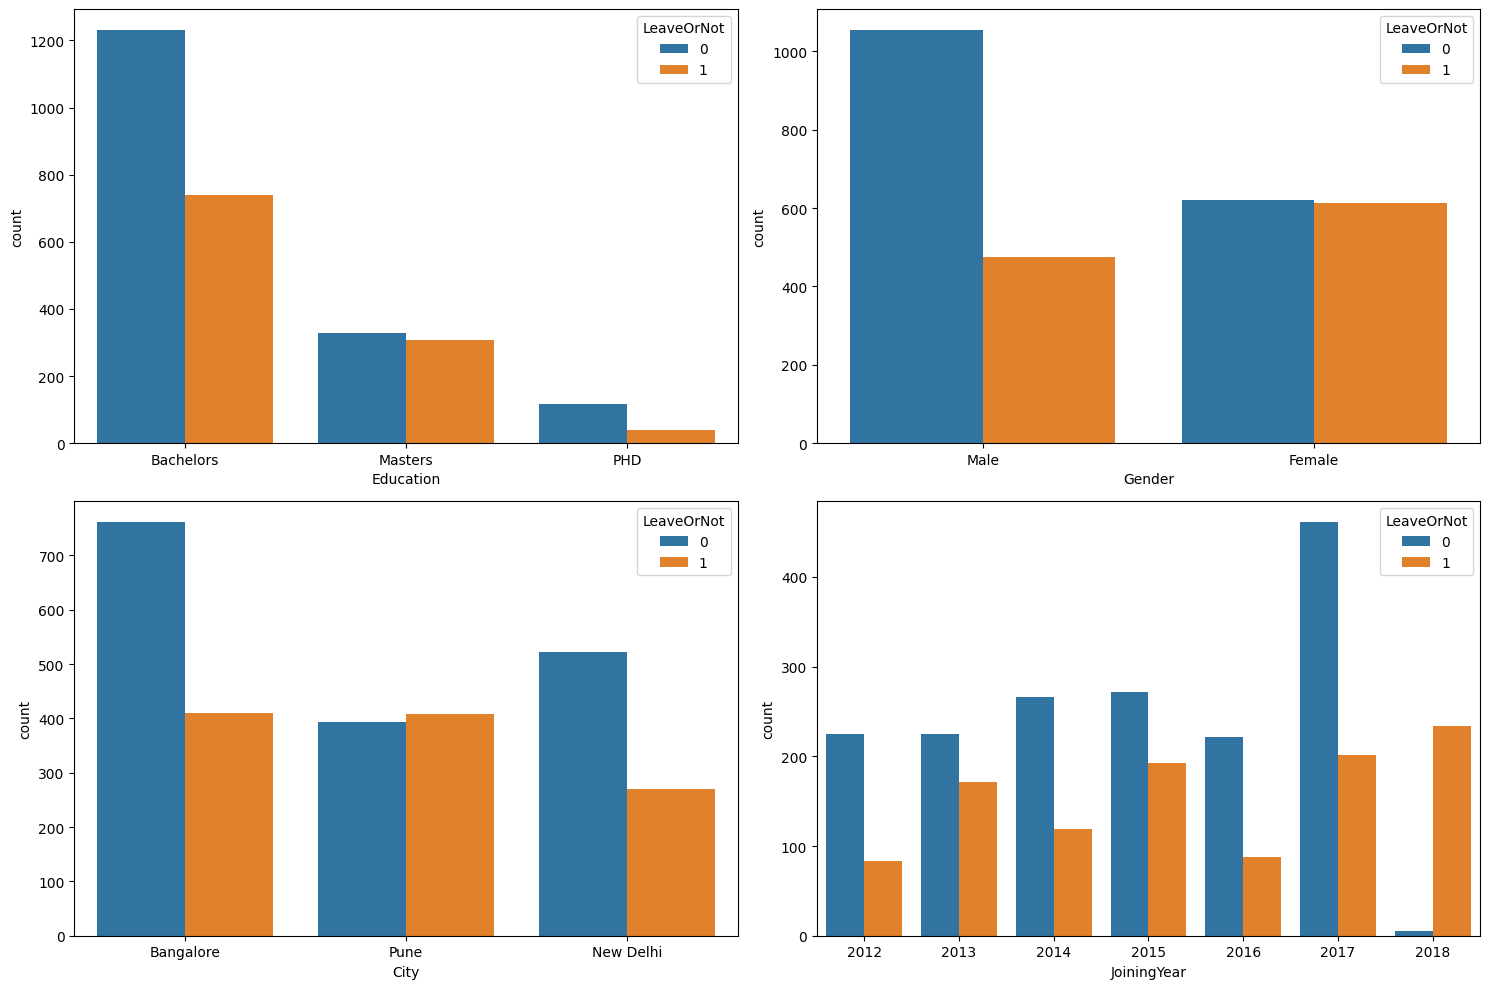

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(data=employee, x='Education', hue="LeaveOrNot", ax=ax[0,0])
sns.countplot(x='Gender', hue="LeaveOrNot", data=employee, ax=ax[0,1])
sns.countplot(x='City', hue="LeaveOrNot", data=employee,  ax=ax[1,0])
sns.countplot(data=employee,x='JoiningYear', hue="LeaveOrNot", ax=ax[1,1])

plt.tight_layout()
plt.show()

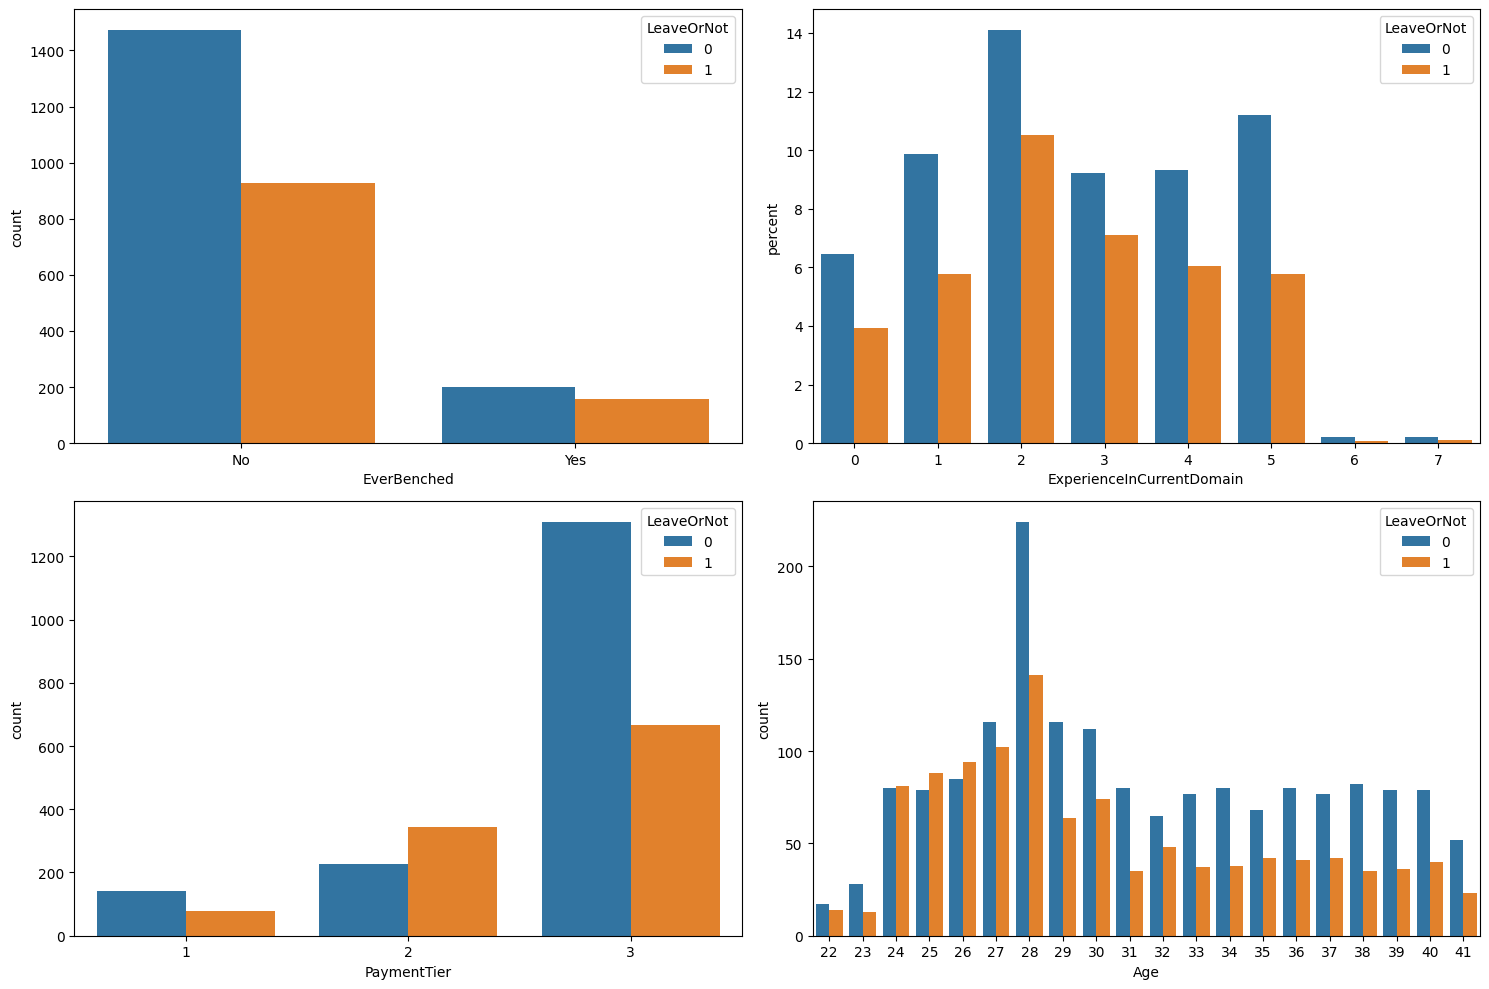

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(data=employee,x='EverBenched',hue='LeaveOrNot', ax=ax[0,0])
sns.countplot(data=employee,x='ExperienceInCurrentDomain',hue='LeaveOrNot', stat="percent", ax=ax[0,1])
sns.countplot(data=employee,x='PaymentTier',hue='LeaveOrNot', ax=ax[1,0])
sns.countplot(data=employee,x='Age',hue='LeaveOrNot', ax=ax[1,1])

plt.tight_layout()
plt.show()

In [ ]:
# Procenat onih koji su otišli ili ostali po koloni

cols = ['Gender','EverBenched','Education']
for i in cols:
    print(round(employee.groupby("LeaveOrNot")[i].value_counts()/employee[i].value_counts()*100,2).to_frame("Procenat 0/1"))
    print()
    print()


                   Procenat 0/1
LeaveOrNot Gender              
0          Male           69.00
           Female         50.28
1          Female         49.72
           Male           31.00


                        Procenat 0/1
LeaveOrNot EverBenched              
0          No                  61.34
           Yes                 55.96
1          No                  38.66
           Yes                 44.04


                      Procenat 0/1
LeaveOrNot Education              
0          Bachelors         62.51
           Masters           51.49
           PHD               74.36
1          Bachelors         37.49
           Masters           48.51
           PHD               25.64




In [28]:
cols = ['City', 'PaymentTier']
for i in cols:
    print(round(employee.groupby("LeaveOrNot")[i].value_counts()/employee[i].value_counts()*100,2).to_frame("Procenat 0/1"))
    print()
    print()

                      Procenat 0/1
LeaveOrNot City                   
0          Bangalore         64.99
           New Delhi         65.91
           Pune              49.06
1          Bangalore         35.01
           Pune              50.94
           New Delhi         34.09


                        Procenat 0/1
LeaveOrNot PaymentTier              
0          3                   66.19
           2                   39.82
           1                   64.68
1          3                   33.81
           2                   60.18
           1                   35.32




In [28]:
print(round(employee.groupby("LeaveOrNot",sort=True)['JoiningYear'].value_counts()/employee['JoiningYear'].value_counts()*100,2).to_frame("Procenat 0/1"))


                        Procenat 0/1
LeaveOrNot JoiningYear              
0          2017                69.64
           2015                58.62
           2014                69.09
           2012                73.05
           2013                56.82
           2016                71.61
           2018                 2.09
1          2018                97.91
           2017                30.36
           2015                41.38
           2013                43.18
           2014                30.91
           2016                28.39
           2012                26.95


In [33]:
print(round(employee.groupby("LeaveOrNot",sort=True)['ExperienceInCurrentDomain'].value_counts()/employee['ExperienceInCurrentDomain'].value_counts()*100,2).to_frame("Procenat 0/1").sort_values(by='ExperienceInCurrentDomain'))

                                      Procenat 0/1
LeaveOrNot ExperienceInCurrentDomain              
0          0                                 62.02
1          0                                 37.98
           1                                 36.95
0          1                                 63.05
           2                                 57.27
1          2                                 42.73
           3                                 43.46
0          3                                 56.54
1          4                                 39.29
0          4                                 60.71
           5                                 65.96
1          5                                 34.04
           6                                 25.00
0          6                                 75.00
           7                                 66.67
1          7                                 33.33
